# 6.4 Linear Regression For Machine Learning

1. The linear regression model (instance-based VS parameter-based)

    Learn how to use linear regression for machine learning.
    * Learn about parametric machine learning algorithm
    * The basics of the linear regression model
    
2. Feaure Selection

    Learn how to select features for linear regression
    * How to choose appropriate features for your model
    * How to generate a heatmap of your data

3. Gradient Descent
    
    Learn how to fit a model using gradiemt descent
    * About optimization problems
    * The theory behind the gradient descent algorithm

4. Ordinary Least Squares
    
    Learn how to fit a model using OLS
    * The theory behind the ordinar least squares algorithm
    * How to choose your model's cost minimization function

5. Processing And Transforming Features

    Learn how to clean and prepare features for linear regression
    * How to transform the training set for a machine learning model

6. Guided Project: Predicting House Sale
    
    Practice building and improving linear regression models
    * How construct your own machine learning model from scratch
    * How to build a machine learning pipeline
    

## 6.4.1 The Linear Regression Model

### 6.4.1.1 Instance Based Learning VS Model Based Learning

<span style="color:red">There is actually **no computational work** for the training process in KNN, instance-based learning </span>

In the first course in this step, __Machine Learning Fundamentals__, we walked through the full machine learning workflow using the k-nearest neighbors algorithm. K-nearest neighbors works by finding similar, labelled examples from the training set for each instance in the test set and uses them to predict the label. K-nearest neighbors is known as an __[instance-based learning](https://en.wikipedia.org/wiki/Instance-based_learning)__ algorithm because it relies completely on previous instances to make predictions. The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column.

Because the __entire training dataset__ is used to find a new instance's nearest neighbors to make label predictions, this algorithm doesn't scale well to medium and larger datasets. If we have a million instances in our training data set and we want to make predictions for a hundred thousand new instances, we'd have to sort the million instances in the training set by Euclidean distance for each instance. The following diagram provides an overview of the complexity of k-nearest neighbors:

![img alt](https://s3.amazonaws.com/dq-content/235/knn_complexity.svg)

We need to instead learn about __parametric machine learning__ approaches, like linear regression and logistic regression. Unlike the k-nearest neighbors algorithm, the result of the training process for these machine learning algorithms is a __mathematical function__ that best approximates the patterns in the training set. In machine learning, this function is often referred to as a __model__.

In this course, we'll explore the most commonly used machine learning model -- the __linear regression model__. Parametric machine learning approaches work by making __assumptions__ about the __relationship between the features and the target column__. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:

$y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n$

The following diagram provides an overview of the machine learning process for linear regression. For now, the goal isn't to understand the entire process but more to compare and contrast with the __nonparametric__ approach of k-nearest neighbors.

![img alt](https://s3.amazonaws.com/dq-content/235/regression_complexity.svg)

In this mission, we'll provide an overview of how we use a linear regression model to make predictions. We'll use scikit-learn for the model training process, so we can focus on gaining intuition for the model-based learning approach to machine learning. In later missions in this course, we'll dive into the math behind how a model is fit to the dataset, how to select and transform features, and more.

In the next screen, we'll introduce the dataset we'll be using throughout this course.

### 6.4.1.2 

To get familiar with this machine learning approach, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that __predict the final sale price__ from its other attributes. Specifically, we'll explore the following questions:

* Which properties of a house most affect the final sale price?
* How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by __[Dean De Cock](http://www.truman.edu/faculty-staff/decock/)__ for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation __[here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf)__ and download the dataset __[here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt)__.

Here are some of the columns:

* Lot Area: Lot size in square feet.
* Overall Qual: Rates the overall material and finish of the house.
* Overall Cond: Rates the overall condition of the house.
* Year Built: Original construction date.
* Low Qual Fin SF: Low quality finished square feet (all floors).
* Full Bath: Full bathrooms above grade.
* Fireplaces: Number of fireplaces.

Let's start by generating train and test datasets and getting more familiar with the data.

#### Instructions

* Read AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.
* Select the first 1460 rows from from data and assign to train.
* Select the remaining rows from data and assign to test.
* Use the dataframe.info() method to display information about each column.
* Read the data documentation to get more familiar with each column.
* Using the __[data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)__, determine which column is the target column we want to predict. Assign the column name as a string to target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Data/AmesHousing.txt', sep="\t")
train = data[:1460]
test = data[1460:]
display(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

None

### 6.4.1.3 Simple Linear Regression

We'll start by understanding the univariate case of linear regression, also known as simple linear regression. The following equation is the general form of the simple linear regression model.

$ \hat{y} = a_1x_1 + a_0 $

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand,$a_0$ and $a_1$ represent the __parameter__ values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:

![img alt](https://s3.amazonaws.com/dq-content/235/simple_linear_regression.svg)

The first step is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $a_0$ and $a_1$ based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

#### Instructions

* Generate 3 scatter plots in the same column:
    * The first plot should plot the Garage Area column on the x-axis against the SalePrice column on the y-axis.
    * The second one should plot the Gr Liv Area column on the x-axis against the SalePrice column on the y-axis.
    * The third one should plot the Overall Cond column on the x-axis against the SalePrice column on the y-axis.
* Read more about these 3 columns in the __[data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)__.




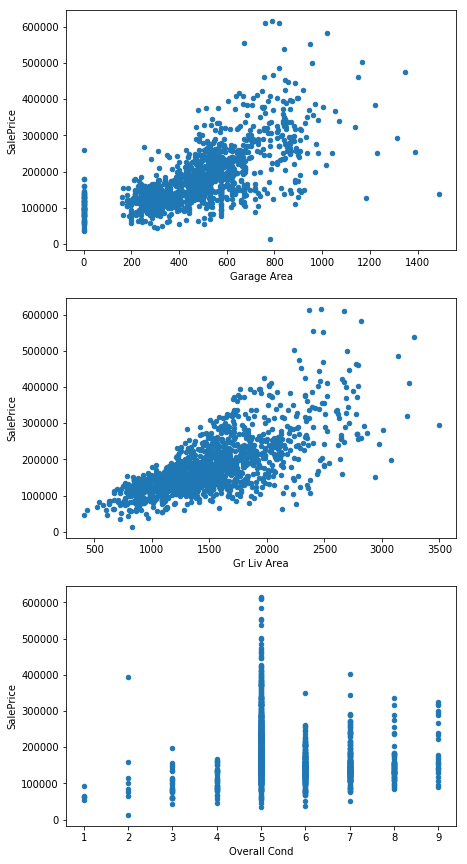

In [3]:
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

### 6.4.1.4 Least Squares

From the last screen, we can tell that the Gr Liv Area feature correlates the most with the SalePrice column. We can confirm this by calculating the correlation between pairs of these columns using the __[pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)__ method:

```python
>>> train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()
              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area     1.000000    0.468997     -0.151521    0.623431
Gr Liv Area     0.468997    1.000000     -0.079686    0.708624
Overall Cond   -0.151521   -0.079686      1.000000    -0.077856
SalePrice       0.623431    0.708624      -0.077856    1.000000
```

The correlation between Gr Liv Area and SalePrice is around 0.709, which is the highest. Recall that the closer the correlation coefficient is to 1.0, the stronger the correlation. Here's the updated form of our model:

$ \hat{y} = a_1*Gr \ Liv \ Area + a_0 $

Let's now move on to understanding the model fitting criteria.

__Residual Sum Of Squares__

To find the optimal parameters for a linear regression model, we want to optimize the model's __residual sum of squares__ (or __[RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)__). If you call, residual (often referred to as errors) describes the difference between the predicted values for the target column $\hat{y}$ and the true values (y) :

![img alt](https://s3.amazonaws.com/dq-content/235/visualizing_rss.svg)

We want this difference to be as small as possible. Calculating RSS involves summing the squared errors:

$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2 $

We can shorten this to:

$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $

If you recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error). Here's the formula for MSE, adapted for our new notation:

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $

While we used the __MSE__ on the test set, it's clear that the __goal of minimizing RSS on the training set__ when training is a good idea.



### 6.4.1.5 Using Scikit-Learn To Train And Predict

Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the __sklearn.neighbors.KNeighborsRegressors class__, we work with the __sklearn.linear_model.LinearRegression class__. The LinearRegression class also has it's own fit() method. Specific to this model, however, is the coef_ and intercept_ attributes, which return $a_1$($a_1$ to $a_n$ if it were a multivariate regression model) and $a_0$ accordingly.

#### Instructions

* Import and instantiate a linear regression model.
* Fit a linear regression model that uses the feature and target columns we explored in the last 2 screens. __Use the default arguments__.
* Display the coefficient and intercept of the fitted model using the coef_ and intercept_ attributes.
* Assign $a_1$ to a1 and $a_0$ to a0.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
a1 = lr.coef_
a0 = lr.intercept_
display(a0)
display(a1)

5366.8217100560432

array([ 116.86624683])

### 6.4.1.6 Making Predictions

In the last step, we fit a univariate linear regression model between the Gr Liv Area and SalePrice column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

$\hat{y} = 116.86624683x_1 + 5366.82171006$

One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the predict() method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the MSE value for those predictions as well.

#### Instructions

* Use the fitted model to make predictions on both the training and test sets.
* Calculate the RMSE value for the predictions on the training set and assign to train_rmse.
* Calculate the RMSE value for the predictions on the test set and assign to test_rmse.

In [6]:
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014
57088.2516126


### 6.4.1.7 Multiple Linear Regression

Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called __multiple linear regression__). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:

$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n $

When using multiple features, the main challenge is __selecting relevant features__. In a later mission in this course, we'll dive into some approaches for feature selection. For now, let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.

* Overall Cond
* Gr Liv Area


#### Instructions

* Train a linear regression model using the columns in cols.
* Use the fitted model to make predictions on both the training and test dataset.
* Calculate the RMSE value for the predictions on the training set and assign to train_rmse_2.
* Calculate the RMSE value for the predictions on the test set and assign to test_rmse_2.

In [7]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.3980153
57066.9077945


### 6.4.1.8 Next Steps

In this mission, we explored the basics of linear regression for machine learning. In the next two missions, we'll dive deeply into 2 different approaches for fitting a linear regression model.

## 6.4.2 Featuring Selection



### 6.4.2.1 Missing Values

In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this mission, we'll explore how to use correlation between features and the target column, correlation between features, and variance of features to select features. We'll continue working with the same housing dataset from the last mission.

We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like Year Built and Year Remod/Add). We'll explore how to deal with both of these in a later mission in this course.

To start, let's look at which columns fall into either of these two categories.

#### Instructions

* Drop the following columns from __[numerical_train](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html)__:
    * PID (place ID isn't useful for modeling)
    * Year Built
    * Year Remod/Add
    * Garage Yr Blt
    * Mo Sold
    * Yr Sold
* Calculate the number of missing values from each column in numerical_train. Create a Series object where the index is made up of column names and the associated values are the number of missing values:
```python
Order                0
PID                  0
MS SubClass          0
MS Zoning            0
...
```
* Assign this Series object to null_series. Select the subset of null_series to keep only the columns with no missing values, and assign the resulting Series object to full_cols_series.
* Display full_cols_series using the print() function.

In [8]:
data = pd.read_csv('Data/AmesHousing.txt', sep="\t")
train = data[:1460]
test = data[1460:]
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

None

In [9]:
''' traditional methods with for loop to select numerical columns
numerical_data = data.copy() ## Deep Copy
for col in data.columns:
    if data[col].dtype == "object":
        numerical_data.drop([col], axis=1, inplace=True)

display(numerical_data.shape)
#display(numerical_data.info())
numerical_data.isnull().sum()
'''

' traditional methods with for loop to select numerical columns\nnumerical_data = data.copy() ## Deep Copy\nfor col in data.columns:\n    if data[col].dtype == "object":\n        numerical_data.drop([col], axis=1, inplace=True)\n\ndisplay(numerical_data.shape)\n#display(numerical_data.info())\nnumerical_data.isnull().sum()\n'

In [10]:
#### DataFrame.select_dtypes
numerical_train = train.select_dtypes(include=['int64', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


### 6.4.2.2 Correlating Feature Columns With Target Column

In the last mission, we selected the feature for the simple linear regression model by comparing how some of the features correlate with the target column. If you recall, we focused on 4 features in particular and used the pandas.DataFrame.corr() method to return the __correlation coefficients__ between each pairs of columns. This means that the correlation matrix for 4 columns results in 16 correlation values:

```python
>>> train[['GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']].corr()
             GarageArea  GrLivArea  OverallCond  SalePrice
GarageArea     1.000000   0.468997    -0.151521   0.623431
GrLivArea      0.468997   1.000000    -0.079686   0.708624
OverallCond   -0.151521  -0.079686     1.000000  -0.077856
SalePrice      0.623431   0.708624    -0.077856   1.000000
```

The subset of features we want to focus on, full_cols_series, contains 27 columns:

```python
>>> len(full_cols_series)
27
```

The resulting correlation matrix will contain __27 * 27 or 729__ correlation values. Comparing and contrasting this many values is __incredibly difficult__. Let's instead focus on just how the feature columns correlate with the target column (SalePrice) instead.

#### Instructions

* Compute the pairwise correlation coefficients between all of the columns in train_subset.
* Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to sorted_corrs.

In [11]:
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


### 6.4.2.3 Correlation Maxtrix Heatmap

We now have a decent list of candidate features to use in our model, sorted by how strongly they're correlated with the SalePrice column. For now, let's keep only the features that have a correlation of 0.3 or higher. This cutoff is a bit arbitrary and, in general, it's a good idea to experiment with this cutoff. For example, you can train and test models using the columns selected using different cutoffs and see where your model stops improving.

The next thing we need to look for is for __potential collinearity__ between some of these feature columns. Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

While we can check for collinearity between 2 columns using the correlation matrix, we __run the risk of information overload__. We can instead generate a __[correlation matrix heatmap](http://seaborn.pydata.org/examples/heatmap_annotation.html)__ using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations. Because we're looking for outlier values in the heatmap, this visual representation is easier.

Here's what the example correlation matrix heatmap looks like from the documentation:

![img alt](https://s3.amazonaws.com/dq-content/236/correlation_heatmap_matrix.png)

To generate a correlation matrix heatmap, we need to pass in the data frame containing the correlation matrix as a data frame into the __seaborn.heatmap()__ function.

#### Instructions

* Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
* Use the __[seaborn.heatmap() function](http://seaborn.pydata.org/generated/seaborn.heatmap.html)__ to generate a correlation matrix heatmap for the columns in strong_corrs.

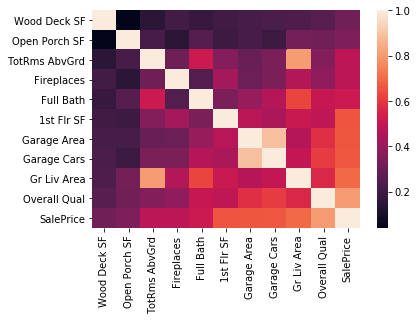

In [12]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
ax = sns.heatmap(corrmat) ## symmetrical

### 6.4.2.4 Train And Test Model

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

* Gr Liv Area and TotRms AbvGrd
* Garage Area and Garage Cars

If we read the descriptions of these columns from the data documentation, we can tell that each pair of column reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.

The last thing we'll need to do is confirm that the test set contains no missing values for these columns:

```python
>>> final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
>>> test[final_corr_cols.index].info()
class 'pandas.core.frame.DataFrame'
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB
```

Looks like the test set has one pesky row with a missing value for Garage Area. Let's just drop this row for now. Finally, let's train and test a model using these columns to see how they fare.

#### Instructions

* Filter the test data frame so it only contains the columns from final_corr_cols.index. Then, drop the row containing missing values and assign the result to clean_test
* Build a linear regression model using the features in features.
* Calculate the RMSE on the test and train sets.
* Assign the train RMSE to train_rmse and the test RMSE to test_rmse.

In [13]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train[target])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.9762919
41032.0261202


In [14]:
display(train[target].describe())
display(clean_test[target].describe())

count      1460.000000
mean     179607.671918
std       78382.176457
min       12789.000000
25%      128987.500000
50%      160000.000000
75%      213062.500000
max      615000.000000
Name: SalePrice, dtype: float64

count      1469.000000
mean     181997.512594
std       81386.601752
min       13100.000000
25%      129900.000000
50%      161000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 6.4.2.5 Removing Low Variance Features

The last technique we'll explore is removing features with low variance. When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

To make __apples to apples comparisons between columns__, we need to rescale all of the columns to vary between __0 and 1__. Then, we can set a __cutoff value__ for variance and remove features that have less than that variance amount. This is known as __min-max scaling__ or as __[rescaling](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling)__. Here's the formula for rescaling:

$\frac{x - min(x)} {max(x) - min(x)}$

Where:

* x is an individual value

* min(x) is the minimum value for the column x belongs to

* max(x) is the maximum value for the column x belongs to


#### Instructions

* Select the columns in features from the train data frame. Rescale each of the columns so the values range from 0 to 1.
* Calculate and display the column minimum and maximum values to ensure that all values range from 0 to 1.
* Calculate the variance of these columns, sort the resulting series by its values, and assign to sorted_vars.
* Display sorted_vars using the print() function.

In [15]:
unit_train = (train[features] - train[features].min(axis=0))/(train[features].max(axis=0) - train[features].min(axis=0))
print(unit_train.min())
print(unit_train.max())
# Confirmed: the min and max values are 0.0 and 1.0 respectively

sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64
Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


### Final Model

To wrap up this mission, let's set a cutoff variance of 0.015, remove the Open Porch SF feature, and train and test a model using the remaining features.

#### Instructions

* Build a linear regression model using the remaining features.
* Calculate the RMSE on the test and train sets.
* Assign the train RMSE to train_rmse_2 and the test RMSE to test_rmse_2.
* Display both RMSE values using the print() function.

In [16]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.6967078
40591.4270244


### 6.4.2.7 Next Steps

We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. __This is most likely the furthest we can go without__ transforming and utilizing the other features in the dataset so we'll stop here for now. In the next 2 missions, we'll explore 2 different ways of fitting models. __Afterwards__, we'll explore ways to __clean and engineer__ new features from the existing features to improve model accuracy even further.

## 6.4.3 Gradient Descent (Iteration Method)

<span style="color:red">**Gradient Descent VS OLS**</span>

## 6.4.4 Ordinary Least Squares (Analytical Method - Closed form solution)

<span style="color:red">**Gradient Descent VS OLS**</span>

__[matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus)__

__[derivation: The Normal Equation and Matrix Calculus](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)__

#### Cost Function in matrix form:
$J(a) = \dfrac{1}{n} (Xa - y)^T(Xa - y)$

#### Derivative of the cost function:
$\frac{dJ(a)}{da} = 2X^TXa - 2X^Ty$

#### Minimizing the cost function:
$2X^TXa - 2X^Ty = 0$

$X^TXa = X^Ty$

$a = (X^TX)^{-1}X^Ty$


### 6.4.4.4 Gradient Descent VS Ordinary Least Squares

Now that we've explored a lot of the math that underlies OLS estimation, let's understand its limitations. The biggest limitation is that OLS estimation is computationally expensive when the data is large. This is because computing a matrix inverse has a computational complexity of apprximately __O(n^3)__. You can read more about __[computational complexity of the matrix inverse and other common matrix operations on Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra)__.

OLS is commonly used when the number of elements in the dataset (and therefore the matrix that's inverted) is less than a few __million elements__. On larger datasets, gradient descent is used because it's much more flexible. For many practical problems, we can set a __threshold accuracy value__ (or a set number of iterations) and use a "good enough" solution. This is especially useful when iterating and trying different features in our model.

### 6.4.4.5 Next Steps

In this mission, we explored a __closed form solution__ to fitting a linear regression model called OLS estimation. We explored some of the intuition behind the math for this technique and ended by exploring it's computational complexity. In the next mission, we'll explore how to clean some of the remaining features in the training set to use in our model.

## 6.4.5 Processing And Transforming Features (Feature Engineering)

* numerical columns
* non-numerical columns (categorical - dummy - one hot coding)
* feature engineering (processing and transforming)
* missing value handling


### 6.4.5.1 Introduction

To understand how linear regression works, we've stuck to using features from the training dataset that contained __no missing values__ and were already in a convenient __numeric representation__. In this mission, we'll explore how to transform some of the the remaining features so we can use them in our model. Broadly, the process of processing and creating new features is known as __[feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)__. Feature engineering is a bit of an art and having __knowledge in the specific domain__ (in this case real estate) can help you create better features. In this mission, we'll focus on some __domain-independent strategies that work for all problems__.

In the __first half__ of this mission, we'll focus only on columns that contain no missing values but still aren't in the proper format to use in a linear regression model. In the __latter half__ of this mission, we'll explore some ways to deal with missing values.

Amongst the columns that don't contain missing values, some of the common issues include:

* the column is not numerical (e.g. a zoning code represented using text)
* the column is numerical but not ordinal (e.g. zip code values)
* the column is numerical but isn't representative of the type of relationship with the target column (e.g. year values)

Let's start by filtering the training set to just the columns containing no missing values.

#### Instructions

* Select __just the columns__ from the train data frame that contain __no missing values__.
* Assign the resulting data frame, that contains just these columns, to __df_no_mv__.
* Use the variables display to become familiar with these columns.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
data = pd.read_csv("Data/AmesHousing.txt", sep="\t")
train = data[:1460]
test = data[1460:]
train_null_counts = train.isnull().sum()
display(train_null_counts)

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       249
Lot Area             0
Street               0
Alley             1351
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        11
Mas Vnr Area        11
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu       717
Garage Type         74
Garage Yr Blt       75
Garage Finish       75
Garage Cars          0
Garage Area          0
Garage Qual

In [19]:
## only selecting columns with no missing values in training data
is_no_mv = train_null_counts == 0
cols_is_no_mv = train_null_counts[is_no_mv].index
df_no_mv = train[cols_is_no_mv]
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Area           1460 non-null int64
Street             1460 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         1460 non-null object
Roof Matl          1460 non-null object
Exterior 1st       14

### 6.4.5.2 Categorical Features

You'll notice that some of the columns in the data frame __df_no_mv__ contain string values. If these columns contain only a limited set of uniuqe values, they're known as __categorical features__. As the name suggests, a categorical feature groups a specific training example into a specific category. Here are some examples from the dataset:

```python
>>> train['Utilities'].value_counts()
AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
​
>>> train['Street'].value_counts()
Pave    1455
Grvl       5
​
>>> train['House Style'].value_counts()
1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
```

To use these features in our model, we need to __transform them into numerical representations__. Thankfully, pandas makes this easy because the library has a special __[categorical data type](https://pandas.pydata.org/pandas-docs/stable/categorical.html)__. We can convert any column that contains no missing values (or an error will be thrown) to the __categorical data type__ using the __pandas.Series.astype() method__:

```python
>>> train['Utilities'] = train['Utilities'].astype('category')
```

When a column is converted to the categorical data type, pandas assigns a code to each unique value in the column. Unless we access these values directly, most of the pandas manipulation operations that work for string columns will work for categorical ones as well.

```python
>>> train['Utilities']
0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
5       AllPub
...
```

We need to use the .cat accessor followed by the .codes property to actually access the underlying numerical representation of a column:

```python
>>> train['Utilities'].cat.codes
```

Let's convert all of the text columns that contain no missing values into the categorical data type.

#### Instructions

* Convert all of the text columns in train to the categorical data type.
* Select the Utilities column, return the categorical codes, and display the unique value counts for those codes: __train['Utilities'].cat.codes.value_counts()__

In [20]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(train[col].unique()))
for col in text_cols:
    train[col] = train[col].astype('category')
train['Utilities'].cat.codes.value_counts()

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1457
2       2
1       1
dtype: int64

### 6.4.5.3 Dummy Coding

When we convert a column to the categorical data type, pandas assigns a number from 0 to n-1 (where n is the number of unique values in a column) for each value. The __drawback__ with this approach is that one of the __assumptions__ of linear regression is __violated__ here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's __no actual numerical meaning__ to the categorical codes that pandas assigned for that colum. An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are __instead used for uniqueness and exclusivity__ (the category associated with 0 is different than the one associated with 1).

The common solution is to use a technique called __[dummy coding](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29)__. Instead of having a __single column__ with n integer codes, we have __n binary columns__. Here's what that would look like for the Utilities column:

<table>
<tbody><tr>
<th>Utilities_AllPub<br></th>
<th>Utilities_NoSewr</th>
<th>Utilities_NoSeWa</th>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>

Because the original values for the first 4 rows were AllPub, in the new scheme, they contain the binary value for true (1) in the Utilities_AllPub column and 0 for the other 2 columns.

Pandas thankfully has a convenience method to help us apply this transformation for all of the text columns called __[pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)__:

```python
dummy_cols = pd.get_dummies()
```

#### Instructions

* Convert all of the columns in text_cols from the train data frame into dummy columns.
* Delete the original columns from text_cols from the train data frame.

In [21]:
## Testing pd.get_dummies, it will remove the original columns automaticalaly, and retain the numerical column.
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
display(df)
display(pd.get_dummies(df))
pd.get_dummies(df, prefix="", prefix_sep="")
## 'C' is numerical, so no changes;
## 'A' and 'B' are categorical, convert them into dummy variables, and remove the original columns automatically.

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


,C,a,b,a,b,c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [22]:
### text columns with missing values
is_mv = train_null_counts != 0
cols_is_mv = train_null_counts[is_mv].index
train[cols_is_mv].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
Lot Frontage      1211 non-null float64
Alley             109 non-null object
Mas Vnr Type      1449 non-null object
Mas Vnr Area      1449 non-null float64
Bsmt Qual         1420 non-null object
Bsmt Cond         1420 non-null object
Bsmt Exposure     1419 non-null object
BsmtFin Type 1    1420 non-null object
BsmtFin SF 1      1459 non-null float64
BsmtFin Type 2    1419 non-null object
BsmtFin SF 2      1459 non-null float64
Bsmt Unf SF       1459 non-null float64
Total Bsmt SF     1459 non-null float64
Bsmt Full Bath    1459 non-null float64
Bsmt Half Bath    1459 non-null float64
Fireplace Qu      743 non-null object
Garage Type       1386 non-null object
Garage Yr Blt     1385 non-null float64
Garage Finish     1385 non-null object
Garage Qual       1385 non-null object
Garage Cond       1385 non-null object
Pool QC           1 non-null object
Fence             297 non-null 

In [23]:
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

In [24]:
train.shape

(1460, 236)

### 6.4.5.4 Transforming Improper Numerical Features (creating new features which are more meaningful based on existing one)

Notes: STEP BY STEP
All 
    - No missing - (meaningful_numerical, non_meaningful_numerical, text) 
    - Missing - (numerical, text)
    - In 6.4.5.3, we just handled the __No-missing-text__ columns




In the last few screens, we focused on categorical values that were represented as text columns. Some of the numerical columns in the data set are also categorical and only have a limited set of unique values. We won't explicitly explore those columns in this mission, but the feature transformation process is the same if the numbers used in those categories have no numerical meaning.

Let's now look at numerical features that aren't categorical, but whose numerical representation needs to be improved. We'll focus on the Year Remod/Add and Year Built columns:

```python
>>> train[['Year Remod/Add', 'Year Built']]
0   1960    1960
1   1961    1961
2   1958    1958
3   1968    1968
4   1998    1997
...
```

The two main issues with these features are:

* Year values aren't representative of __how old__ a house is
* The Year Remod/Add column doesn't actually provide useful information for a linear regression model


The challenge with year values like 1960 and 1961 is that they don't do a good job of capturing how old a house is. For example, a house that was built in 1960 but sold in 1980 was sold in half the time one built in 1960 and sold in 2000. Instead of the years certain events happened, we want the __difference between those years__. We should create a new column that's the difference between both of these columns.

For this particular piece of information (years until remodeled), this is a sensible approach. Domain knowledge can help you understand how to best transform features to represent information well for a linear model. If you're ever confused about a feature or how it should be represented, reading scientific papers or posts by researchers in the specific domain is critical. Many winners of __[Kaggle data science competitions](https://www.import.io/post/how-to-win-a-kaggle-competition/)__, for example, claim that their focus on data preparation and feature engineering combined with common machine learning models helped them win.

#### Instructions

* Create a new column years_until_remod in the train data frame that represents the difference between Year Remod/Add (the later value) and Year Built (the earlier value).




In [25]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

In [26]:
train[['years_until_remod', 'Year Remod/Add', 'Year Built']].head()

,years_until_remod,Year Remod/Add,Year Built
0,0,1960,1960
1,0,1961,1961
2,0,1958,1958
3,0,1968,1968
4,1,1998,1997


### 6.4.5.5 Missing Values

In the next few screens, we'll focus on handling columns with missing values. When values are missing in a column, there are two main approaches we can take:

* Remove rows containing missing values for specific columns
    * Pro: Rows containing missing values are removed, leaving only clean data for modeling
    * Con: Entire observations from the training set are removed, which can reduce overall prediction accuracy
* Impute (or replace) missing values using a descriptive statistic from the column
    * Pro: Missing values are replaced with potentially similar estimates, preserving the rest of the observation in the model.
    * Con: Depending on the approach, we may be adding noisy data for the model to learn

Given that we only have 1460 training examples (with ~80 potentially useful features), we don't want to remove any of these rows from the dataset. Let's instead focus on __imputation techniques__.

We'll focus on columns that contain at least 1 missing value but less than 365 missing values (or 25% of the number of rows in the training set). There's no strict threshold, and many people instead use a __50% cutoff__ (if half the values in a column are missing, it's automatically __dropped__). Having some domain knowledge can help with __determining an acceptable cutoff value__.

#### Instructions

* Select only the columns from train that contain more than 0 missing values but less than 584 missing values. Assign the resulting data frame to df_missing_values.
* Display the number of missing values for each column in df_missing_values.
* Display the data type for each column in df_missing_values.

In [27]:
## Reload data 
data = pd.read_csv('Data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()

# is_0_584 = (train_null_counts>0) and (train_null_counts<584) 'AND' not working here.
# Should use Binary Comparison
is_0_584 = (train_null_counts>0) & (train_null_counts<584)
cols_is_0_584 = train_null_counts[is_0_584].index
df_missing_values = train[cols_is_0_584]

display(df_missing_values.head())
display(df_missing_values.dtypes)

,Lot Frontage,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,141.0,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,1.0,0.0,Attchd,1960.0,Fin,TA,TA
1,80.0,None,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0,Attchd,1961.0,Unf,TA,TA
2,81.0,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0,Attchd,1958.0,Unf,TA,TA
3,93.0,None,0.0,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,1.0,0.0,Attchd,1968.0,Fin,TA,TA
4,74.0,None,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0,Attchd,1997.0,Fin,TA,TA


Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object

### 6.4.5.6 Imputing Missing Values

It looks like about half of the columns in df_missing_values are string columns (object data type), while about half are float64 columns. For numerical columns with missing values, a common strategy is to compute the mean, median, or mode of each column and replace all missing values in that column with that value.

Because imputation is a common task, pandas contains a __[pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)__ method that we can use for this. If we pass in a value, all of the missing values (NaN) in the data frame are replaced by that value:

```python
# Only select float columns.
missing_floats = df_missing_vals.select_dtypes(include=['float'])
​
# Returns a data frame with missing values replaced with 0.
fill_with_zero = missing_floats.fillna(0)
```

You can also pass in a column-wise summarization function and fill in missing values that way:

```python
# Returns a data frame with missing values replaced with mean of that column.
fill_with_mean = missing_floats.fillna(missing_floats.mean())
```

Let's impute all of the missing values in float columns with each column's mean.

#### Instructions

* Impute the missing values from float_cols with the column's mean.
* Check for any missing values in float_cols.

In [28]:
float_cols = df_missing_values.select_dtypes(include=['float'])
float_cols.fillna(float_cols.mean(), inplace=True)

float_cols.isnull().sum()

C:\Miniconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64

### 6.4.5.7 Next Steps

In this mission, we explored a few different techniques for transforming features into appropriate representations for a linear regression model. Next in this course is a guided project, where you'll practice the techniques you've learned in this course to build better linear regression models.